<a href="https://colab.research.google.com/github/prazwalpandey/ML-Exercises/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Construct decision tree of the dataset using gain, gain ratio and gini index



# **Decision Trees**
## Overview
A decision tree is a supervised learning algorithm used for both classification and regression tasks. It splits a dataset into subsets based on the value of input features, creating a tree-like model of decisions. The final model can be used to make predictions by traversing the tree from the root to a leaf node, following the decisions made at each internal node.

## Why Decision Trees are Required?
*Interpretability* : Decision trees are easy to understand and interpret. The hierarchical structure resembles human decision-making, making them suitable for situations where interpretability is crucial.

*Non-Linearity* : Decision trees can model complex, non-linear relationships without requiring extensive data preprocessing.

*Flexibility* : They handle both numerical and categorical data and can manage datasets with missing values.

*Feature Importance* : Decision trees provide insights into the importance of different features, which can be valuable for feature selection.

## Where Decision Trees are Used
*Classification* : Classifying emails as spam or non-spam, diagnosing medical conditions, predicting customer churn.

*Regression*: Predicting house prices, estimating product demand, forecasting financial metrics.

*Feature Selection*: Identifying the most important features in a dataset.

*Data Preprocessing*: Simplifying data for other machine learning models.

## Constructing a Decision Tree
1>Start with the entire dataset at the root node.

2>Choose the best attribute to split the data based on a splitting criterion (Information Gain, Gain Ratio, Gini Index).

3>Split the dataset into subsets where each subset contains data with the same value for the chosen attribute.

4>Repeat steps 2 and 3 recursively for each subset, creating child nodes until a stopping condition is met (e.g., maximum tree depth, minimum samples per node, all nodes are pure).

In [11]:
'''1.Importing all the necessary libraries'''
import pandas as pd #Used for data manipulation and analysis
from sklearn.tree import DecisionTreeClassifier, export_graphviz #Decision Tree Classifier is used to create decision tress and export_garphviz is used for DOT format visualization.
from sklearn.preprocessing import LabelEncoder #To label each category of data numerically for processing
import graphviz #Helps to visualize DOT forms from export_grarphviz

In [12]:
'''2.Defining my data'''
data = {
    'RID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'age': ['youth', 'youth', 'middle_aged', 'senior', 'senior', 'senior', 'middle_aged', 'youth', 'youth', 'senior', 'youth', 'middle_aged', 'middle_aged', 'senior'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'no', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

In [13]:
'''3.Converting the data into DataFrames for processing.'''
df = pd.DataFrame(data)

In [14]:
'''4.Now Labeling each category of data numerically using LabelEncoder.'''
label_encoders = {}
for column in df.select_dtypes(include=["object"]): #looping through each column of object type
  label_encoders[column]=LabelEncoder() #initializing
  df[column] = label_encoders[column].fit_transform(df[column])

In [15]:
'''5. Let's Remove the unwanted thing and then define feature and goal'''
X=df.drop(columns=['RID','buys_computer'])
y=df['buys_computer']

In [18]:
'''6. Initializing Decision Tree with [criteria].'''
#a.Entropy i.e. Gain
dt_gain = DecisionTreeClassifier(criterion="entropy")
dt_gain.fit(X,y)
#b. Gain Ratio
dt_gain_ratio=DecisionTreeClassifier(criterion="entropy",splitter="best",max_features="sqrt") #splitter="best" specifies the strategy used to choose the split at each node and max_features="sqrt"controls the number of features to consider when looking for the best split.
dt_gain_ratio.fit(X,y)
#c. Gini Index
dt_gini = DecisionTreeClassifier(criterion="gini")
dt_gini.fit(X,y)

DecisionTreeClassifier()

In [19]:
# Visualize decision trees using graphviz
def graph_visualizer(dt, feature_names, class_names):
  dot_data = export_graphviz(dt, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)#'ut_file=None' means rather being disk save, returns DOT source code to be generated as a string
  return graphviz.Source(dot_data)

Decision Tree Using Information Gain > 


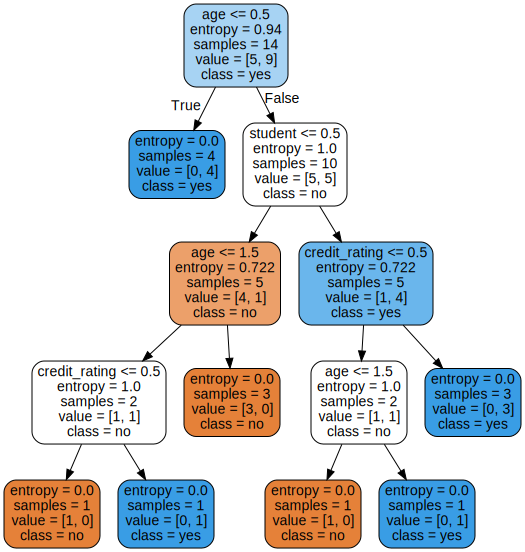

In [21]:
#For Gain(Information Gain)
print("Decision Tree Using Information Gain > ")
graph_visualizer(dt_gain,X.columns, label_encoders['buys_computer'].classes_)

Decision Tree using Gain Ratio:


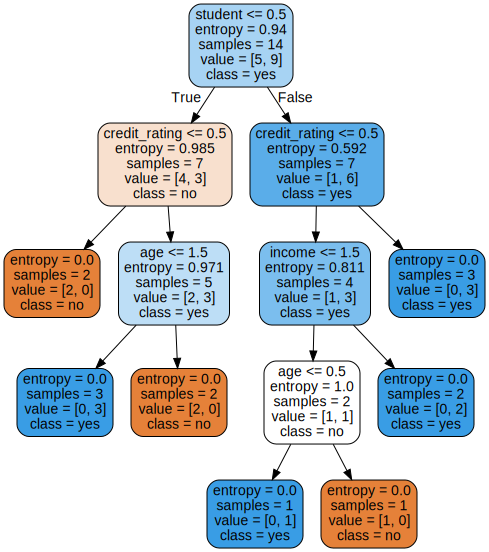

In [22]:
# For Gain Ratio
print("Decision Tree using Gain Ratio:")
visualize_tree(dt_gain_ratio, X.columns, label_encoders['buys_computer'].classes_)

Decision Tree using Gini Index:


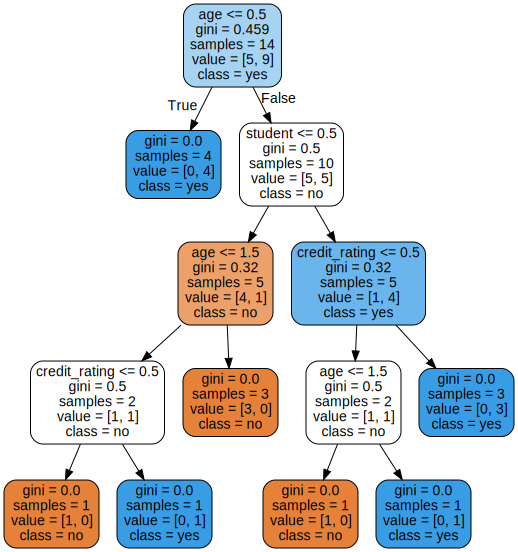

In [23]:
# For Gini Index
print("Decision Tree using Gini Index:")
visualize_tree(dt_gini, X.columns, label_encoders['buys_computer'].classes_)